<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [4]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [4]:
# Answer:
movies.loc[:,'duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
# Answer:
movies.sort_values('duration')

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
742,7.6,Following,R,Mystery,69,"[u'Jeremy Theobald', u'Alex Haw', u'Lucy Russe..."
351,8.0,Frankenstein,UNRATED,Horror,70,"[u'Colin Clive', u'Mae Clarke', u'Boris Karloff']"
938,7.4,Alice in Wonderland,G,Animation,75,"[u'Kathryn Beaumont', u'Ed Wynn', u'Richard Ha..."
405,7.9,The Bride of Frankenstein,NOT RATED,Horror,75,"[u'Boris Karloff', u'Elsa Lanchester', u'Colin..."
303,8.0,The Nightmare Before Christmas,PG,Animation,76,"[u'Danny Elfman', u'Chris Sarandon', u""Catheri..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

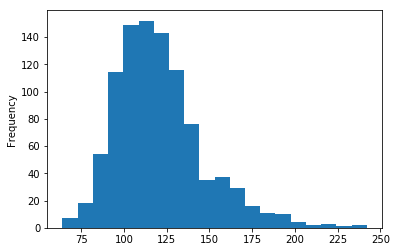

In [12]:
# Answer:
ax = movies.loc[:,'duration'].plot(kind='hist', bins=20)

#### Use a box plot to display that same data.

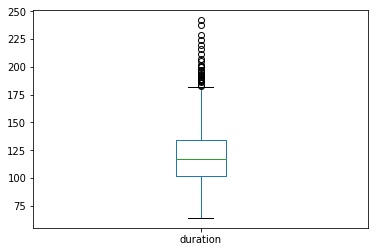

In [8]:
# Answer:
ax = movies.loc[:,'duration'].plot(kind='box')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [10]:
# Answer:
movies.loc[:,'content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

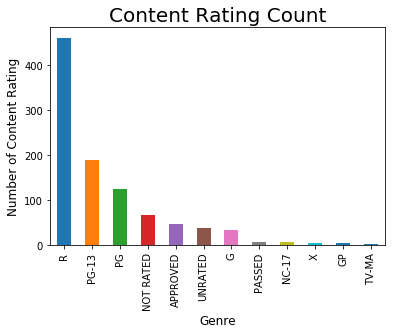

In [15]:
# Answer:
ax = movies.loc[:,'content_rating'].value_counts().plot(kind='bar')
ax.set_title('Content Rating Count', fontsize=20)
ax.set_ylabel('Number of Content Rating', fontsize=12)
ax.set_xlabel('Genre', fontsize=12);

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [12]:
# Answer:
# Select column 'content_rating' and then replace Not Rated, Approved, Passed, GP to Unrated 
# Check value count to see if added to Not Rated 
movies.loc[:,'content_rating'] = movies.loc[:,'content_rating'].replace({'NOT RATED': 'UNRATED', 'APPROVED': 'UNRATED', 'PASSED': 'UNRATED', 'GP': 'UNRATED'})
movies.loc[:,'content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [13]:
# Answer:
# Select column 'content_rating' and then replace X and TV-MA to NC-17 
# Check value count to see if added to NC-17
movies.loc[:,'content_rating'] = movies.loc[:,'content_rating'].replace({'X': 'NC-17', 'TV-MA':'NC-17'})
movies.loc[:,'content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [18]:
# Answer:
#check the number of missing values in each column and sum them up by column 
movies.isna().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [15]:
# Answer:
movies.loc[movies.loc[:,'content_rating'].isna(),:] #all movies are PG-13 according to Google

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [16]:
movies.loc[:, 'content_rating'] = movies.loc[:, 'content_rating'].fillna(value='PG-13') #replace missing value with PG-13
print(movies.isna().sum()) #showing no missing values
print(movies.loc[:,'content_rating'].value_counts()) #showing it added to PG-13

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64
R          460
PG-13      192
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [20]:
# Answer:
movies_gt_2_avg = movies.loc[movies.loc[:,'duration'] > 120,'star_rating'].mean() #select all movies that are greater than two hours and find the mean of the star_rating
movies_lt_2_avg = movies.loc[movies.loc[:,'duration'] < 120,'star_rating'].mean() #select all movies that are less than two hours and find the mean of the star_rating 
print(movies_gt_2_avg)
print(movies_lt_2_avg)

7.953669724770622
7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

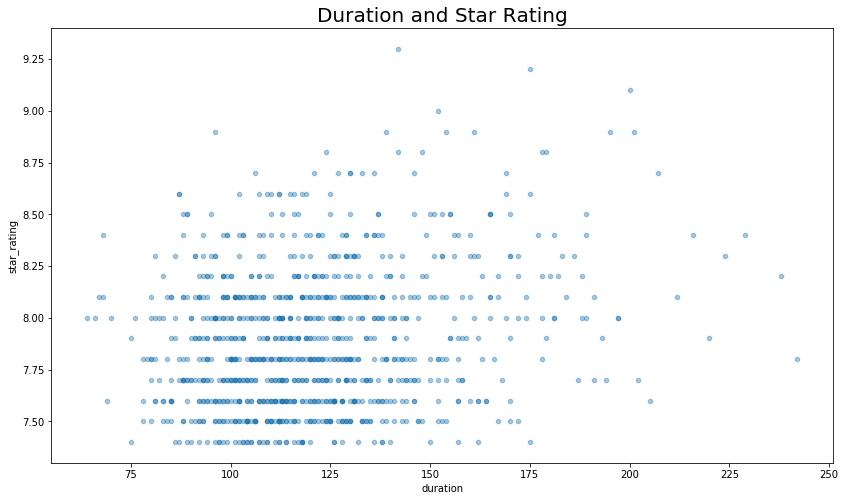

In [18]:
# Answer:
ax = movies.plot(kind='scatter', x='duration', y='star_rating', alpha=.4, figsize=(14,8))
ax.set_title('Duration and Star Rating', fontsize=20);

#used a scatterplot. there seem to be a positive relationship but still spread out

#### Calculate the average duration for each genre.

In [19]:
# Answer:
movies.groupby('genre').agg({'duration':'mean'})

,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


## Advanced level

#### Visualize the relationship between content rating and duration.

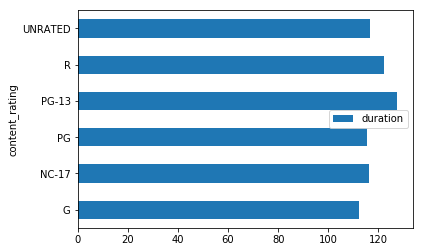

In [20]:
# Answer
mean_by_content_rating = movies.groupby('content_rating').agg({'duration':'mean'})
mean_by_content_rating.plot(kind='barh');

#used a horizontal bar to visualize the relationship 

#### Find the title of the movie with the highest star rating in each genre

In [21]:
movies.groupby('genre')['star_rating'].max()

genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
Name: star_rating, dtype: float64

In [29]:
#Option 1
movies_max = movies.groupby('genre')['star_rating'].transform('max') == movies.loc[:,'star_rating'] #used transform max to see if the max star rating for each genre equals to the star_rating for each column
movies.loc[movies_max,['star_rating', 'title', 'genre']].sort_values(['genre','star_rating']) #select only star_rating,title, and genre column where movies_max is true, then sort by genre and star rating

,star_rating,title,genre
3,9.0,The Dark Knight,Action
7,8.9,The Lord of the Rings: The Return of the King,Adventure
30,8.6,Spirited Away,Animation
8,8.9,Schindler's List,Biography
25,8.6,Life Is Beautiful,Comedy
29,8.6,City Lights,Comedy
35,8.6,Modern Times,Comedy
0,9.3,The Shawshank Redemption,Crime
5,8.9,12 Angry Men,Drama
9,8.9,Fight Club,Drama


In [23]:
#Option 2 
max1 = movies.groupby('genre')['star_rating'].max().reset_index() #set table to a data frame 
movies.merge(max1, on=['genre','star_rating']).sort_values(['genre','star_rating']) #merge the original movies dataset to the data frame above on genre and star_rating and sort by genre and star rating

,star_rating,title,content_rating,genre,duration,actors_list
1,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
5,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
10,8.6,Spirited Away,PG,Animation,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."
6,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
7,8.6,Life Is Beautiful,PG-13,Comedy,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
8,8.6,City Lights,UNRATED,Comedy,87,"[u'Charles Chaplin', u'Virginia Cherrill', u'F..."
9,8.6,Modern Times,G,Comedy,87,"[u'Charles Chaplin', u'Paulette Goddard', u'He..."
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
2,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
3,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [102]:
# Answer:
movies.loc[:,'title'].value_counts() == 2 #first check the value counts of movie title and saw that some of them have 2 titles 
movies.loc[movies.loc[:,'title'].isin(['The Girl with the Dragon Tattoo','True Grit','Dracula','Les Miserables']),:].sort_values('title') #selected the ones with two titles and look at all the columns

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


**You only need to choose one of the options below.** However, solving for multiple options would count as "extra credit" that could e.g. raise your score from a 2 ("meets expectations") to a 3 ("exceeds expectations").

#### Option 1: manually create a list of relevant genres, then filter using that list

In [31]:
# Answer:
movies.groupby('genre').agg({'star_rating': ['count','mean']}) #use this code to identify genre that are >10 to create list_relevant_genres

list_relevant_genres = ['Action','Adventure','Animation','Biography','Comedy','Crime','Drama','Horror','Mystery']
list_relevant_genres
movies_count_1 = movies.loc[movies.loc[:,'genre'].isin(list_relevant_genres),:].groupby('genre').agg({'star_rating':'mean'}) #filter all rows that are in that genre and group by genre to find the mean of star_rating
movies_count_1

,star_rating
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Horror,7.806897
Mystery,7.975000


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [37]:
# Answer:
movies_value_count = movies['genre'].value_counts().reset_index() #getting the value count of each genre 
movies_value_count.columns = ['genre','genre_count'] #change the name of the columns to genre and genre count
movies_count = movies.merge(movies_value_count, on='genre') #merge the data frame from above to movies data set on genre 
movies_count

movies_count_2 = movies_count.loc[movies_count.loc[:,'genre_count'] > 10,['star_rating','genre']].groupby('genre').mean() 
#select rows with genre count more than 10 and keep the columns star_rating and genre and groupby genre 
movies_count_2

,star_rating
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Horror,7.806897
Mystery,7.975000


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [39]:
# Answer:
booleanSeries = movies.genre.value_counts() #group by genre to count # of rows in each genre 
booleanSeries = booleanSeries >= 10 #if count is greater than 10, then give back true if not false
booleanSeries

movie_count_3 = movies.groupby('genre')['star_rating'].mean() #find mean of star_rating for each genre 
movie_count_3[booleanSeries] #select the ones that are true 

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [41]:
# Answer:
movie_count_4 = movies.groupby('genre').agg({'star_rating': ['count','mean']}) #aggregate by count and mean by genre for star_rating
movie_count_4
movie_count_4[movie_count_4['star_rating']['count'] > 10] #filter out where the count >10 from the dataframe movie_count_4

star_rating          
                count      mean
genre                          
Action            136  7.884559
Adventure          75  7.933333
Animation          62  7.914516
Biography          77  7.862338
Comedy            156  7.822436
Crime             124  7.916935
Drama             278  7.902518
Horror             29  7.806897
Mystery            16  7.975000

In [78]:
movies.sort_values('title').head()

,star_rating,title,content_rating,genre,duration,actors_list
542,7.8,(500) Days of Summer,PG-13,Comedy,95,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
201,8.1,12 Years a Slave,R,Biography,134,"[u'Chiwetel Ejiofor', u'Michael Kenneth Willia..."
698,7.6,127 Hours,R,Adventure,94,"[u'James Franco', u'Amber Tamblyn', u'Kate Mara']"
110,8.3,2001: A Space Odyssey,G,Mystery,160,"[u'Keir Dullea', u'Gary Lockwood', u'William S..."


## Bonus

#### Figure out something "interesting" using the actors data!